In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
base_dir = './'
data_dir = os.path.join(base_dir, 'data')
results_dir = os.path.join(base_dir, 'results')

ExternalGrid      0.924946
Renewables       26.795937
Conventionals    23.230507
SteelPlant       50.026444
Name: 2023-04-19 23:45:00, dtype: float64

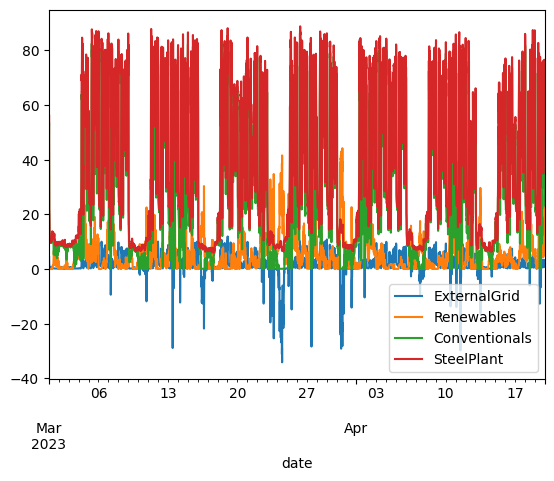

In [25]:
results = pd.read_csv(os.path.join(results_dir, 'results_A.csv'))\
            .rename(columns={'GridSim.ExternalGrid-0-ExternalGrid-P[MW]': 'ExternalGrid',
                            })
results['date'] = pd.to_datetime(results['date'], utc=False)
results.set_index('date', inplace=True)
results['Conventionals'] = results[[i for i in results.columns if 'PowerPlant' in i]].sum(1)# * (-1)
results['Renewables'] = results[[i for i in results.columns if 'PV' in i or 'WT' in i]].sum(1)# * (-1)
results['SteelPlant'] = results[[i for i in results.columns if 'SteelPlant' in i]].sum(1)
results['ExternalGrid'] = results['ExternalGrid']# * (-1)
results[['ExternalGrid', 
         'Renewables',
         'Conventionals',
         'SteelPlant',
         ]].plot()
results[['ExternalGrid', 
         'Renewables',
         'Conventionals',
         'SteelPlant',
         ]].iloc[-1]